In [ ]:
!pip -q install --no-deps transformer-lens==2.15.4
!pip -q install datasets==2.19.1 fsspec==2024.3.1 gcsfs==2024.3.1
!pip -q install jaxtyping==0.3.1 typeguard==4.2.0 beartype==0.14.1 \
                 better-abc==0.0.3 fancy-einsum==0.0.3 \
                 transformers-stream-generator==0.0.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformer-lens 2.15.4 requires beartype<0.15.0,>=0.14.1, which is not installed.
transformer-lens 2.15.4 requires better-abc<0.0.4,>=0.0.3, which is not installed.
transformer-lens 2.15.4 requires fancy-einsum>=0.0.3, which is not installed.
transformer-lens 2.15.4 requires jaxtyping>=0.2.11, which is not installed.
transformer-lens 2.15.4 requires transformers-stream-generator<0.0.6,>=0.0.5, which is not installed.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 wh

In [ ]:
!pip uninstall -y transformers transformers-stream-generator -q || true
!pip install -q transformers==4.40.2 transformers-stream-generator==0.0.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 112.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformer-lens 2.15.4 requires transformers>=4.43, but you have transformers 4.40.2 which is incompatible.
sentence-transformers 4.1.0 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.40.2 which is incompatible.


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from tqdm import tqdm


model_name = "gpt2-xl"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-47): 48 x GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1600, out_features=50257, bias=False)
)

In [ ]:
import pandas as pd


wiki_data_path = "/content/drive/MyDrive/AttentionLens/data/wiki.pickle"
df_wiki = pd.read_pickle(wiki_data_path)
df_wiki = df_wiki[['subject', 'context_tokenized_dedup_no-stopwords']].copy()


df_wiki['context_set'] = df_wiki['context_tokenized_dedup_no-stopwords'].apply(lambda tokens: set(tokens))
print(f"Total subjects loaded: {len(df_wiki)}")
df_wiki.head(2)

Total subjects loaded: 1195


,subject,context_tokenized_dedup_no-stopwords,context_set
0,Vinson Massif,"[itan, interpreter, summ, Sams, destroyed,...","{wards, eastern, War, ier, eing, went, ite,..."
1,Beats Music,"[ hired, instrumental, independently, ref, ...","{ documenting, anded, copyright, While, Wall..."


In [ ]:
activations = {}

def make_hook_attn_out(layer_index, token_index):
    def hook(module, module_input, module_output):
        output = module_output[0] if isinstance(module_output, tuple) else module_output
        # output shape: [batch_size, seq_len, hidden_dim]
        activations[f'attn_out_{layer_index}'] = output[:, token_index, :].detach()
    return hook

def make_hook_mlp_out(layer_index, token_index):
    def hook(module, module_input, module_output):
        output = module_output[0] if isinstance(module_output, tuple) else module_output
        # output shape: [batch_size, seq_len, hidden_dim]
        activations[f'm_out_{layer_index}'] = output[:, token_index, :].detach()
    return hook

In [ ]:
embedding_matrix = model.get_input_embeddings().weight  # shape: [vocab_size, hidden_dim]


num_layers = model.config.n_layer
attn_attribute_rates = [0.0] * num_layers
mlp_attribute_rates = [0.0] * num_layers
count = 0


for idx, row in tqdm(df_wiki.iterrows(), total=len(df_wiki)):
    subject = row['subject']
    context_set = row['context_set']
    if not context_set:
        continue
    prompt = f"{subject} is known for"
    inputs = tokenizer(prompt, return_tensors='pt')
    input_ids = inputs['input_ids'].to(device)
    subj_ids = tokenizer(subject, add_special_tokens=False)['input_ids']
    subj_token_ids = tokenizer.convert_ids_to_tokens(subj_ids)
    prompt_tokens = tokenizer.convert_ids_to_tokens(input_ids[0])
    subj_len = len(subj_ids)
    start_idx = None
    for i in range(len(prompt_tokens) - subj_len + 1):
        if prompt_tokens[i:i+subj_len] == subj_token_ids:
            start_idx = i
            break
    if start_idx is None:
        continue
    last_token_index = start_idx + subj_len - 1

    hooks = []
    for layer in range(num_layers):
        hooks.append(model.transformer.h[layer].attn.register_forward_hook(make_hook_attn_out(layer, last_token_index)))
        hooks.append(model.transformer.h[layer].mlp.register_forward_hook(make_hook_mlp_out(layer, last_token_index)))
    with torch.no_grad():
        _ = model(input_ids)
    for h in hooks:
        h.remove()

    vocab_size = embedding_matrix.shape[0]
    for layer in range(num_layers):
        attn_vec = activations[f'attn_out_{layer}'].to(device)
        logits_attn = attn_vec @ embedding_matrix.T
        topk_attn = torch.topk(logits_attn, k=50, dim=-1)
        top_indices_attn = topk_attn.indices[0].cpu().tolist()
        top_tokens_attn = [tokenizer.decode([idx]) for idx in top_indices_attn]
        hits_attn = len(set(top_tokens_attn) & context_set)
        attn_rate = hits_attn / len(top_tokens_attn) * 100.0
        attn_attribute_rates[layer] += attn_rate

        mlp_vec = activations[f'm_out_{layer}'].to(device)
        logits_mlp = mlp_vec @ embedding_matrix.T
        topk_mlp = torch.topk(logits_mlp, k=50, dim=-1)
        top_indices_mlp = topk_mlp.indices[0].cpu().tolist()
        top_tokens_mlp = [tokenizer.decode([idx]) for idx in top_indices_mlp]
        hits_mlp = len(set(top_tokens_mlp) & context_set)
        mlp_rate = hits_mlp / len(top_tokens_mlp) * 100.0
        mlp_attribute_rates[layer] += mlp_rate

    count += 1

if count > 0:
    attn_attribute_rates = [val / count for val in attn_attribute_rates]
    mlp_attribute_rates = [val / count for val in mlp_attribute_rates]
else:
    print("No valid subjects with context attributes found.")

100%|██████████| 1195/1195 [02:55<00:00,  6.83it/s]


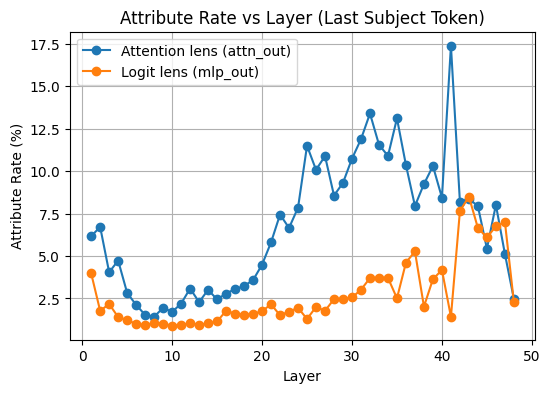

,layer,attention_lens_attr_rate,mlp_lens_attr_rate
0,1,6.162343,3.981590
1,2,6.712971,1.772385
2,3,4.043515,2.175732
3,4,4.733054,1.405858
4,5,2.830126,1.233473
5,6,2.122176,0.995816
6,7,1.534728,0.918828
7,8,1.424268,1.072803
8,9,1.953138,1.017573
9,10,1.710460,0.897071


In [ ]:
import matplotlib.pyplot as plt

layers = list(range(1, num_layers+1))

plt.figure(figsize=(6,4))
plt.plot(layers, attn_attribute_rates, label="Attention lens (attn_out)", marker='o')
plt.plot(layers, mlp_attribute_rates, label="Logit lens (mlp_out)", marker='o')
plt.title("Attribute Rate vs Layer (Last Subject Token)")
plt.xlabel("Layer")
plt.ylabel("Attribute Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

results_df = pd.DataFrame({
    "layer": layers,
    "attention_lens_attr_rate": attn_attribute_rates,
    "mlp_lens_attr_rate": mlp_attribute_rates
})
results_df.to_csv("attribute_rate_per_layer.csv", index=False)
results_df.head(10)

In [ ]:
results_df.to_json("attribute_rate_per_layer.json", orient="records", indent=2)